# **Week 5: Route and Airport-Level Analysis**

In [0]:
import pandas as pd
output_path = "/Volumes/workspace/airlines/flight/cleaned_dataset.csv"
data = pd.read_csv(output_path)
display(data.head(10))

DayOfWeek Date DepTime ArrTime CRSArrTime UniqueCarrier Airline FlightNum TailNum ActualElapsedTime CRSElapsedTime AirTime ArrDelay DepDelay Origin Org_Airport Dest Dest_Airport Distance TaxiIn TaxiOut Cancelled CancellationCode Diverted CarrierDelay WeatherDelay NASDelay SecurityDelay LateAircraftDelay DepHour DepMinute DepDatetime Month Hour Route DayOfWeekNum DayName Thursday 2019-01-03 1829 1959 1925 WN Southwest Airlines Co. 3920 N464WN 90 90 77 34 34 IND Indianapolis International Airport BWI Baltimore-Washington International Airport 515 3 10 0 N 0 2 0 0 0 32 18 29 2019-01-03 18:29:00 1 18 IND-BWI 3 Thursday Thursday 2019-01-03 1937 2037 1940 WN Southwest Airlines Co. 509 N763SW 240 250 230 57 67 IND Indianapolis International Airport LAS McCarran International Airport 1591 3 7 0 N 0 10 0 0 0 47 19 37 2019-01-03 19:37:00 1 19 IND-LAS 3 Thursday Thursday 2019-01-03 1644 1845 1725 WN Southwest Airlines Co. 1333 N334SW 121 135 107 80 94 IND Indianapolis International Airport MCO Orlando International Airport 828 6 8 0 N 0 8 0 0 0 72 16 44 2019-01-03 16:44:00 1 16 IND-MCO 3 Thursday Thursday 2019-01-03 1452 1640 1625 WN Southwest Airlines Co. 675 N286WN 228 240 213 15 27 IND Indianapolis International Airport PHX Phoenix Sky Harbor International Airport 1489 7 8 0 N 0 3 0 0 0 12 14 52 2019-01-03 14:52:00 1 14 IND-PHX 3 Thursday Thursday 2019-01-03 1323 1526 1510 WN Southwest Airlines Co. 4 N674AA 123 135 110 16 28 IND Indianapolis International Airport TPA Tampa International Airport 838 4 9 0 N 0 0 0 0 0 16 13 23 2019-01-03 13:23:00 1 13 IND-TPA 3 Thursday Thursday 2019-01-03 1416 1512 1435 WN Southwest Airlines Co. 54 N643SW 56 70 49 37 51 ISP Long Island MacArthur Airport BWI Baltimore-Washington International Airport 220 2 5 0 N 0 12 0 0 0 25 14 16 2019-01-03 14:16:00 1 14 ISP-BWI 3 Thursday Thursday 2019-01-03 1657 1754 1735 WN Southwest Airlines Co. 623 N724SW 57 70 47 19 32 ISP Long Island MacArthur Airport BWI Baltimore-Washington International Airport 220 5 5 0 N 0 7 0 0 0 12 16 57 2019-01-03 16:57:00 1 16 ISP-BWI 3 Thursday Thursday 2019-01-03 1422 1657 1610 WN Southwest Airlines Co. 188 N215WN 155 195 143 47 87 ISP Long Island MacArthur Airport FLL Fort Lauderdale-Hollywood International Airport 1093 6 6 0 N 0 40 0 0 0 7 14 22 2019-01-03 14:22:00 1 14 ISP-FLL 3 Thursday Thursday 2019-01-03 2107 2334 2230 WN Southwest Airlines Co. 362 N798SW 147 165 134 64 82 ISP Long Island MacArthur Airport MCO Orlando International Airport 972 6 7 0 N 0 5 0 0 0 59 21 7 2019-01-03 21:07:00 1 21 ISP-MCO 3 Thursday Thursday 2019-01-03 1812 1927 1815 WN Southwest Airlines Co. 422 N779SW 135 145 118 72 82 ISP Long Island MacArthur Airport MDW Chicago Midway International Airport 765 6 11 0 N 0 3 0 0 0 69 18 12 2019-01-03 18:12:00 1 18 ISP-MDW 3 Thursday

Org_Airport Dest_Airport Flight_Count Route Chicago O'Hare International Airport LaGuardia Airport (Marine Air Terminal) 1920 Chicago O'Hare International Airport → LaGuardia Airport (Marine Air Terminal) LaGuardia Airport (Marine Air Terminal) Chicago O'Hare International Airport 1615 LaGuardia Airport (Marine Air Terminal) → Chicago O'Hare International Airport Los Angeles International Airport San Francisco International Airport 1603 Los Angeles International Airport → San Francisco International Airport San Francisco International Airport Los Angeles International Airport 1457 San Francisco International Airport → Los Angeles International Airport McCarran International Airport Los Angeles International Airport 1305 McCarran International Airport → Los Angeles International Airport William P. Hobby Airport Dallas Love Field 1276 William P. Hobby Airport → Dallas Love Field Dallas Love Field William P. Hobby Airport 1200 Dallas Love Field → William P. Hobby Airport Chicago O'Hare International Airport Los Angeles International Airport 1154 Chicago O'Hare International Airport → Los Angeles International Airport Phoenix Sky Harbor International Airport McCarran International Airport 1152 Phoenix Sky Harbor International Airport → McCarran International Airport Dallas/Fort Worth International Airport Chicago O'Hare International Airport 1125 Dallas/Fort Worth International Airport → Chicago O'Hare International Airport

/home/spark-e2c322a5-6569-4418-84de-7a/.ipykernel/2471/command-8376522952111478-1313713567:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


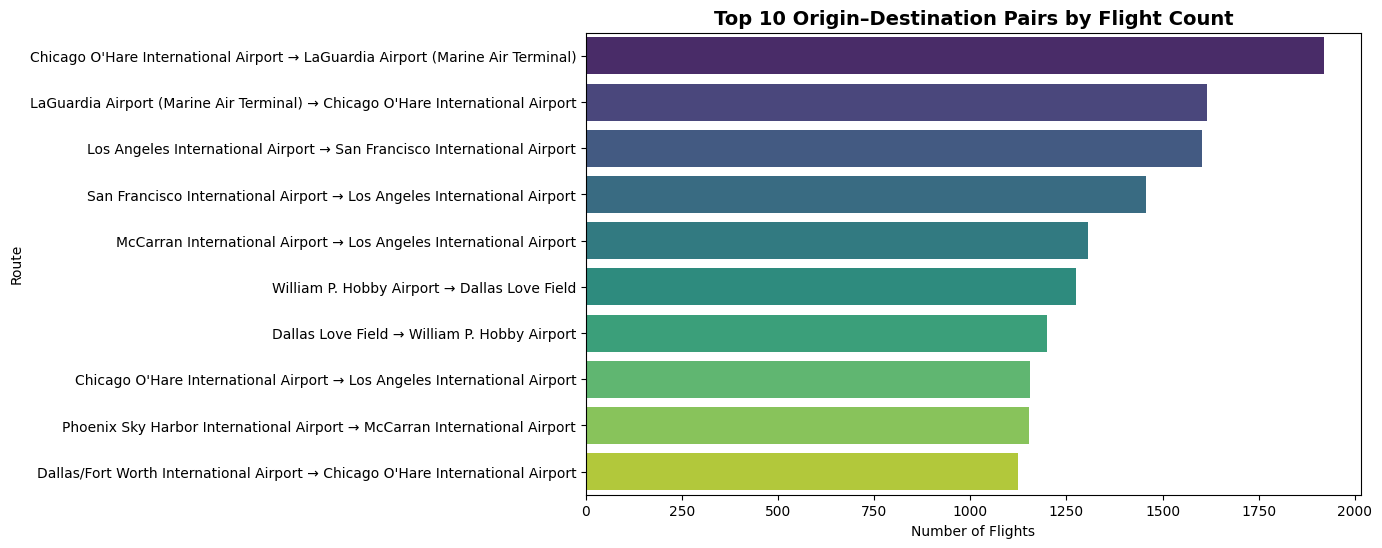

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

if all(col in data.columns for col in ['Org_Airport', 'Dest_Airport']):
    top_routes = (
        data.groupby(['Org_Airport', 'Dest_Airport'])
        .size()
        .reset_index(name='Flight_Count')
        .sort_values(by='Flight_Count', ascending=False)
        .head(10)
    )
    top_routes['Route'] = (
        top_routes['Org_Airport'].astype(str) + ' → ' + top_routes['Dest_Airport'].astype(str)
    )
    display(top_routes)
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=top_routes,
        x='Flight_Count',
        y='Route',
        palette='viridis'
    )
    plt.title("Top 10 Origin–Destination Pairs by Flight Count", fontsize=14, fontweight='bold')
    plt.xlabel("Number of Flights")


In [0]:
if all(col in data.columns for col in ['Org_Airport', 'Dest_Airport', 'DepDelay']):
    # Create pivot table
    pivot_route = data.pivot_table(
        index='Org_Airport',
        columns='Dest_Airport',
        values='DepDelay',
        aggfunc='mean'
    )

    # Plot heatmap
    plt.figure(figsize=(max(8, 0.5 * len(pivot_route.columns)), max(6, 0.4 * len(pivot_route.index))))
    sns.heatmap(
        pivot_route,
        cmap='coolwarm',
        annot=False,
        cbar_kws={'label': 'Avg Departure Delay (min)'},
        xticklabels=True,
        yticklabels=True
    )

    plt.title('Heatmap of Average Departure Delay by Route (Origin → Destination)', fontsize=14)
    plt.xlabel('Destination Airport', fontsize=14)
    plt.ylabel('Origin Airport', fontsize=14)
    plt.xticks(fontsize=11, rotation=45, ha='right')
    plt.yticks(fontsize=11)
    plt.tight_layout()
    display(plt.gcf())
    plt.close()

/home/spark-e2c322a5-6569-4418-84de-7a/.ipykernel/2471/command-6952036790698262-465947300:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


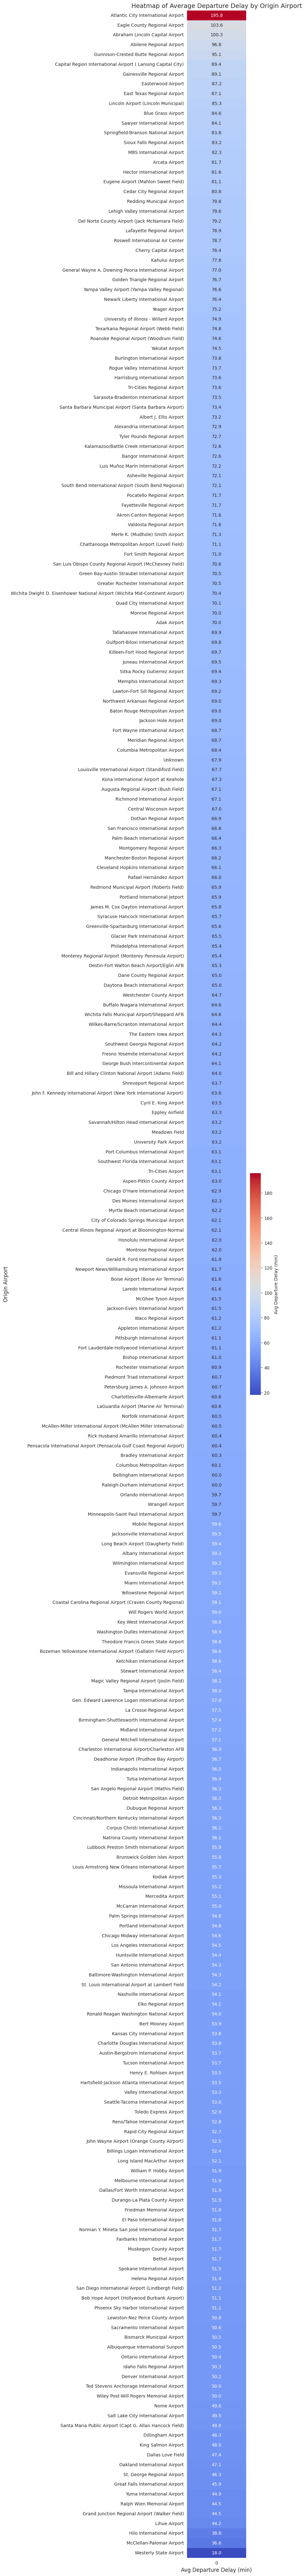

In [0]:
# Check if the required columns exist
if all(col in data.columns for col in ['Org_Airport', 'DepDelay']):
    # Calculate mean delay per origin airport
    pivot_airport = data.groupby('Org_Airport')['DepDelay'].mean().sort_values(ascending=False)

    # Plot heatmap
    plt.figure(figsize=(3, len(pivot_airport) * 0.4))
    sns.heatmap(
        pivot_airport.values.reshape(-1, 1),
        annot=True,
        fmt=".1f",
        yticklabels=pivot_airport.index,
        cmap='coolwarm',
        cbar_kws={'label': 'Avg Departure Delay (min)'},
        annot_kws={'fontsize': 10}
    )

    plt.title('Heatmap of Average Departure Delay by Origin Airport', fontsize=14)
    plt.xlabel('Avg Departure Delay (min)', fontsize=12)
    plt.ylabel('Origin Airport', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

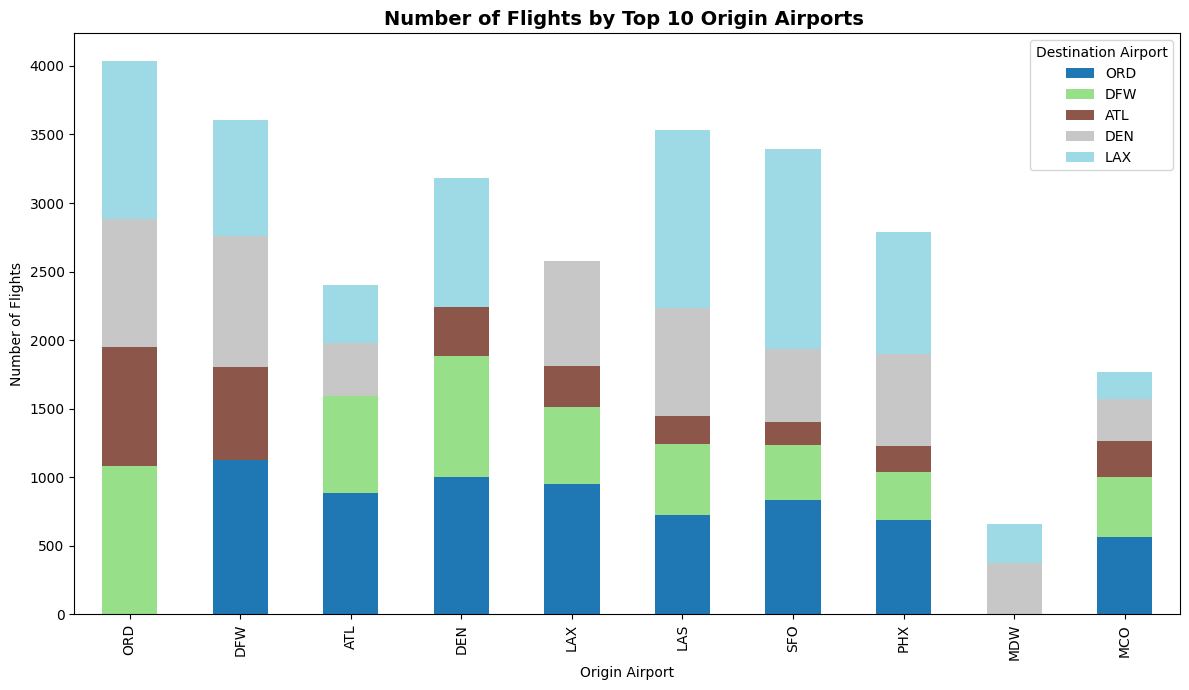


**Observation:**
- The stacked bar chart shows the distribution of flights from the top 10 origin airports to the top 5 destination airports.
- The origin airport with the highest total number of flights (to these top destinations) is **ORD** with **4036** flights.
- The most popular destination among these is **LAX** with **7489** flights from the top origins.
- This visualization highlights key airport hubs and their most frequent connections.


In [0]:
top_10_origins = data[origin_col].value_counts().nlargest(10).index
top_5_dests = data[dest_col].value_counts().nlargest(5).index

stacked_data = (
    data[data[origin_col].isin(top_10_origins) & data[dest_col].isin(top_5_dests)]
    .groupby([origin_col, dest_col])
    .size()
    .unstack(fill_value=0)
    .loc[top_10_origins, top_5_dests]
)

stacked_data.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='tab20'
)
plt.title("Number of Flights by Top 10 Origin Airports ", fontsize=14, fontweight='bold')
plt.xlabel("Origin Airport")
plt.ylabel("Number of Flights")
plt.legend(title="Destination Airport")
plt.tight_layout()
display(plt.gcf())
plt.close()
top_origin = stacked_data.sum(axis=1).idxmax()
top_origin_count = stacked_data.sum(axis=1).max()
top_dest = stacked_data.sum(axis=0).idxmax()
top_dest_count = stacked_data.sum(axis=0).max()

from IPython.display import Markdown
observation = f"""
**Observation:**
- The stacked bar chart shows the distribution of flights from the top 10 origin airports to the top 5 destination airports.
- The origin airport with the highest total number of flights (to these top destinations) is **{top_origin}** with **{top_origin_count}** flights.
- The most popular destination among these is **{top_dest}** with **{top_dest_count}** flights from the top origins.
- This visualization highlights key airport hubs and their most frequent connections.
"""
display(Markdown(observation))

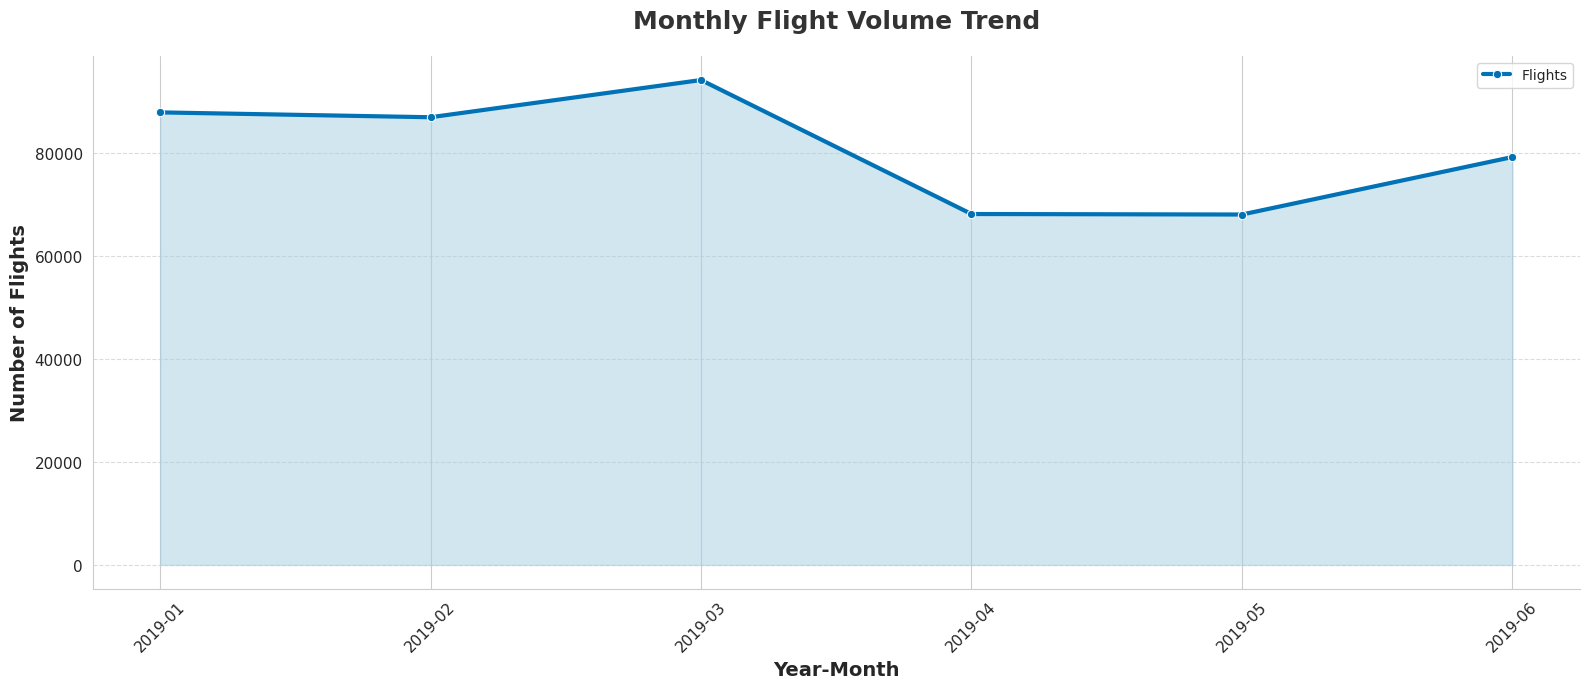


**Observation:**
- The area chart above shows the trend of total flights per month.
- The month with the highest number of flights is **2019-03** with **94196** flights.
- This visualization helps identify seasonality and trends in flight activity.


In [0]:
if 'DATE' in data.columns:
    date_col = 'DATE'
else:
    date_col = next((col for col in data.columns if 'date' in col.lower()), None)

if not date_col:
    raise ValueError("No date column found for time series analysis.")

data[date_col] = pd.to_datetime(data[date_col], errors='coerce')
data['YEAR_MONTH'] = data[date_col].dt.to_period('M').astype(str)
monthly_flights = data.groupby('YEAR_MONTH').size().reset_index(name='FLIGHT_COUNT')

plt.figure(figsize=(16, 7))
sns.set_style("whitegrid")
sns.lineplot(
    data=monthly_flights,
    x='YEAR_MONTH',
    y='FLIGHT_COUNT',
    marker='o',
    linewidth=3,
    color='#0072B5',
    label='Flights'
)
plt.fill_between(
    monthly_flights['YEAR_MONTH'],
    monthly_flights['FLIGHT_COUNT'],
    color='#A6CEE3',
    alpha=0.5
)
plt.title("Monthly Flight Volume Trend", fontsize=18, fontweight='bold', color='#333333', pad=20)
plt.xlabel("Year-Month", fontsize=14, fontweight='bold')
plt.ylabel("Number of Flights", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()
display(plt.gcf())
plt.close()
peak_month = monthly_flights.loc[monthly_flights['FLIGHT_COUNT'].idxmax(), 'YEAR_MONTH']
peak_count = monthly_flights['FLIGHT_COUNT'].max()
observation = f"""
**Observation:**
- The area chart above shows the trend of total flights per month.
- The month with the highest number of flights is **{peak_month}** with **{peak_count}** flights.
- This visualization helps identify seasonality and trends in flight activity.
"""
display(Markdown(observation))

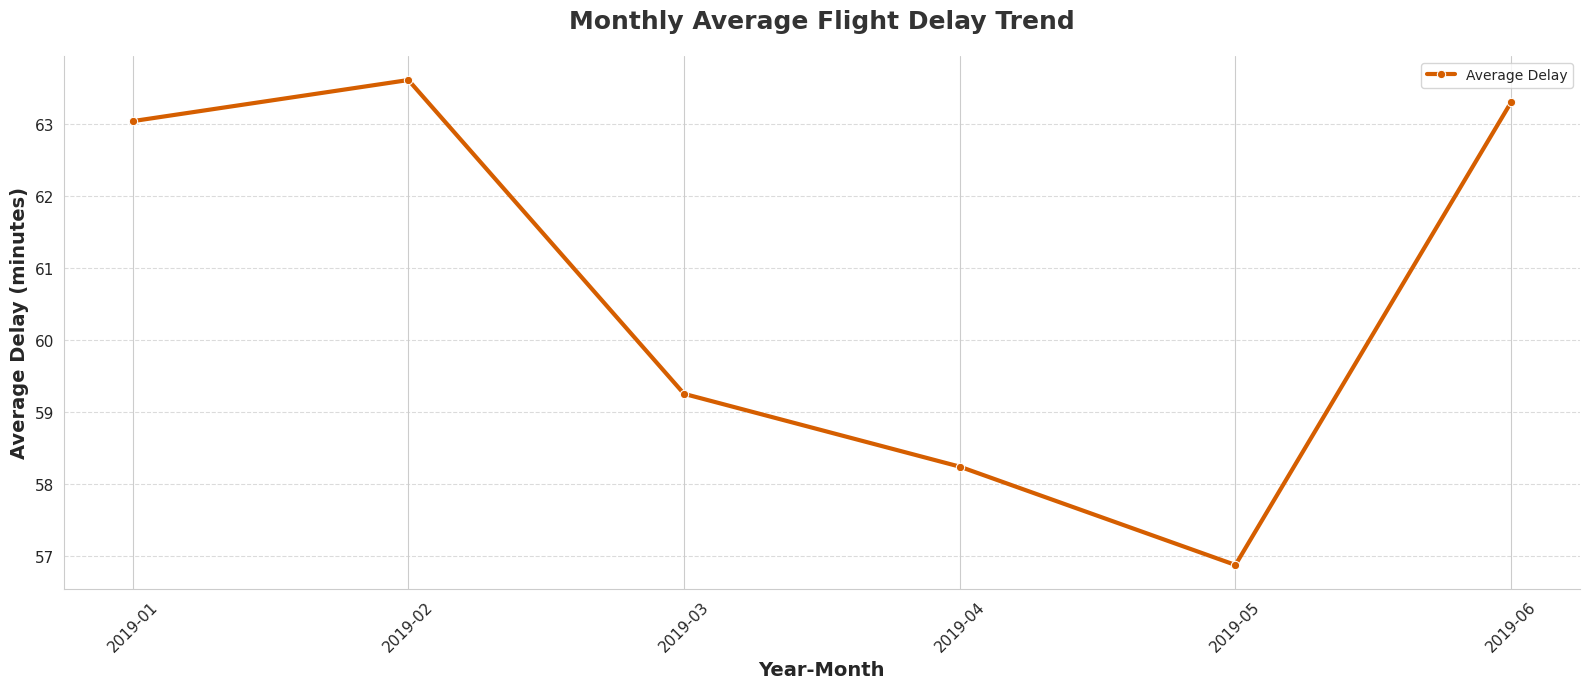


**Observation:**
- The line chart above shows the trend of average flight delay per month.
- The month with the highest average delay is **2019-02** with **63.6** minutes.
- This analysis helps identify periods with higher operational delays.


In [0]:
if not delay_col:
    raise ValueError("No delay column found for analysis.")

monthly_delay = (
    data.groupby('YEAR_MONTH')[delay_col]
    .mean()
    .reset_index(name='AVG_DELAY')
)

plt.figure(figsize=(16, 7))
sns.set_style("whitegrid")
sns.lineplot(
    data=monthly_delay,
    x='YEAR_MONTH',
    y='AVG_DELAY',
    marker='o',
    linewidth=3,
    color='#D55E00',
    label='Average Delay'
)
plt.title("Monthly Average Flight Delay Trend", fontsize=18, fontweight='bold', color='#333333', pad=20)
plt.xlabel("Year-Month", fontsize=14, fontweight='bold')
plt.ylabel("Average Delay (minutes)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()
display(plt.gcf())
plt.close()
peak_delay_month = monthly_delay.loc[monthly_delay['AVG_DELAY'].idxmax(), 'YEAR_MONTH']
peak_avg_delay = monthly_delay['AVG_DELAY'].max()
observation = f"""
**Observation:**
- The line chart above shows the trend of average flight delay per month.
- The month with the highest average delay is **{peak_delay_month}** with **{peak_avg_delay:.1f}** minutes.
- This analysis helps identify periods with higher operational delays.
"""
display(Markdown(observation))

/home/spark-e2c322a5-6569-4418-84de-7a/.ipykernel/2471/command-8376522952111483-2122917141:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_category_counts, x='DELAY_CATEGORY', y='FLIGHT_COUNT', palette='Set2')


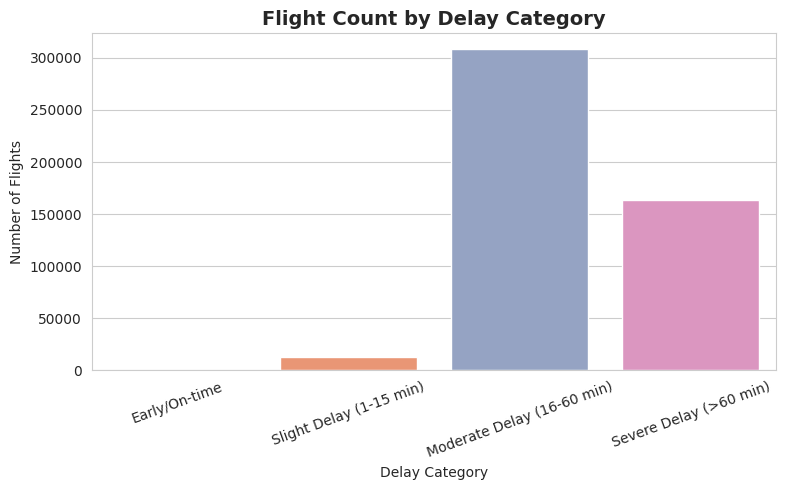


**Observation:**
- The bar chart shows the distribution of flights by delay category.
- The most common category is **Early/On-time** with **0** flights.
- This helps understand the overall punctuality and delay profile of the dataset.


In [0]:
bins = [-float('inf'), 0, 15, 60, float('inf')]
labels = ['Early/On-time', 'Slight Delay (1-15 min)', 'Moderate Delay (16-60 min)', 'Severe Delay (>60 min)']

data['DELAY_CATEGORY'] = pd.cut(data[delay_col], bins=bins, labels=labels, right=True)

delay_category_counts = data['DELAY_CATEGORY'].value_counts().reindex(labels).reset_index()
delay_category_counts.columns = ['DELAY_CATEGORY', 'FLIGHT_COUNT']

plt.figure(figsize=(8, 5))
sns.barplot(data=delay_category_counts, x='DELAY_CATEGORY', y='FLIGHT_COUNT', palette='Set2')
plt.title("Flight Count by Delay Category", fontsize=14, fontweight='bold')
plt.xlabel("Delay Category")
plt.ylabel("Number of Flights")
plt.xticks(rotation=20)
plt.tight_layout()
display(plt.gcf())
plt.close()
top_cat = delay_category_counts.iloc[0]['DELAY_CATEGORY']
top_cat_count = delay_category_counts.iloc[0]['FLIGHT_COUNT']
from IPython.display import Markdown
observation = f"""
**Observation:**
- The bar chart shows the distribution of flights by delay category.
- The most common category is **{top_cat}** with **{top_cat_count}** flights.
- This helps understand the overall punctuality and delay profile of the dataset.
"""
display(Markdown(observation))

In [0]:
import numpy as np
unique_airports = data['Org_Airport'].unique()
coords = {a: (np.random.uniform(25, 49), np.random.uniform(-125, -67)) for a in unique_airports}

data["Latitude"] = data["Org_Airport"].map(lambda x: coords[x][0])
data["Longitude"] = data["Org_Airport"].map(lambda x: coords[x][1])
display(data[['Org_Airport', 'Latitude', 'Longitude']])

Org_Airport   Latitude   Longitude
0            Indianapolis International Airport  44.051417  -81.289281
1            Indianapolis International Airport  44.051417  -81.289281
2            Indianapolis International Airport  44.051417  -81.289281
3            Indianapolis International Airport  44.051417  -81.289281
4            Indianapolis International Airport  44.051417  -81.289281
...                                         ...        ...         ...
484544  Dallas/Fort Worth International Airport  35.187724 -116.350085
484545  Dallas/Fort Worth International Airport  35.187724 -116.350085
484546  Dallas/Fort Worth International Airport  35.187724 -116.350085
484547  Dallas/Fort Worth International Airport  35.187724 -116.350085
484548  Dallas/Fort Worth International Airport  35.187724 -116.350085

[484549 rows x 3 columns]

In [0]:
%pip install folium branca
import folium
from folium.plugins import MarkerCluster, MiniMap, Fullscreen, BeautifyIcon, MeasureControl, MousePosition
import branca.colormap as cm

# Aggregate: busiest airports (by flight count) and average delays
airport_stats = (
    data.groupby('Org_Airport')
    .agg(
        FLIGHT_COUNT=('Org_Airport', 'count'),
        AVG_DELAY=(delay_col, 'mean'),
        LATITUDE=('Latitude', 'first'),
        LONGITUDE=('Longitude', 'first')
    )
    .reset_index()
    .dropna(subset=['LATITUDE', 'LONGITUDE'])
)

# Top 20 busiest airports
top_airports = airport_stats.sort_values('FLIGHT_COUNT', ascending=False).head(20)

# Color scale for average delay
min_delay, max_delay = top_airports['AVG_DELAY'].min(), top_airports['AVG_DELAY'].max()
colormap = cm.LinearColormap(['green', 'yellow', 'red'], vmin=min_delay, vmax=max_delay)
colormap.caption = 'Average Delay (minutes)'

# Create map centered on US
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4, tiles='cartodbpositron')

# Add minimap, fullscreen, measure, and mouse position controls
MiniMap(toggle_display=True).add_to(m)
Fullscreen().add_to(m)
MeasureControl(primary_length_unit='kilometers').add_to(m)
MousePosition(
    position='bottomright',
    separator=' | ',
    prefix='Lat/Lon:',
    lat_formatter="function(num) {return L.Util.formatNum(num, 4);}",
    lng_formatter="function(num) {return L.Util.formatNum(num, 4);}"
).add_to(m)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in top_airports.iterrows():
    popup_html = f"""
        <div style='font-size:14px'>
        <b>Airport:</b> {row['Org_Airport']}<br>
        <b>Flights:</b> {int(row['FLIGHT_COUNT']):,}<br>
        <b>Avg Delay:</b> {row['AVG_DELAY']:.1f} min<br>
        <b>Rank:</b> {idx+1}
        </div>
    """
    icon = BeautifyIcon(
        icon_shape='circle',
        border_color=colormap(row['AVG_DELAY']),
        background_color=colormap(row['AVG_DELAY']),
        text_color='black',
        number=idx+1,
        border_width=3
    )
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        icon=icon,
        popup=folium.Popup(popup_html, max_width=250),
        tooltip=f"{row['Org_Airport']}: {int(row['FLIGHT_COUNT'])} flights, {row['AVG_DELAY']:.1f} min avg delay"
    ).add_to(marker_cluster)

colormap.add_to(m)

# Add title, legend, and instructions using HTML
title_html = """
     <h3 align="center" style="font-size:22px; margin-bottom:0;"><b>Top 20 Busiest US Airports: Flight Volume & Average Delay</b></h3>
     <p align="center" style="font-size:15px; margin-top:0;">
        <b>Circle size</b> = Flight count; <b>Color</b> = Avg delay (green: low, red: high)<br>
        <b>Click</b> a marker for airport details. <b>Zoom</b> or <b>pan</b> to explore. <b>Use</b> the minimap, fullscreen, and measure tools for navigation.
     </p>
     """
m.get_root().html.add_child(folium.Element(title_html))

display(m)

# Add insights/observation
from IPython.display import Markdown
busiest_airport = top_airports.iloc[0]['Org_Airport']
busiest_count = int(top_airports.iloc[0]['FLIGHT_COUNT'])
max_delay_airport = top_airports.loc[top_airports['AVG_DELAY'].idxmax(), 'Org_Airport']
max_delay_value = top_airports['AVG_DELAY'].max()
min_delay_airport = top_airports.loc[top_airports['AVG_DELAY'].idxmin(), 'Org_Airport']
min_delay_value = top_airports['AVG_DELAY'].min()
observation = f"""
**Observation:**
- The interactive map displays the top 20 busiest US airports by flight volume.
- The busiest airport is **{busiest_airport}** with **{busiest_count}** flights.
- Among these, the airport with the highest average delay is **{max_delay_airport}** (**{max_delay_value:.1f}** min), while the lowest is **{min_delay_airport}** (**{min_delay_value:.1f}** min).
- Circle number = airport rank; color = average delay (green: low, red: high).
- Use the map controls (minimap, fullscreen, measure, mouse position) for a more interactive experience.
"""
display(Markdown(observation))

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.



**Observation:**
- The interactive map displays the top 20 busiest US airports by flight volume.
- The busiest airport is **Chicago O'Hare International Airport** with **46945** flights.
- Among these, the airport with the highest average delay is **John F. Kennedy International Airport (New York International Airport)** (**73.7** min), while the lowest is **Phoenix Sky Harbor International Airport** (**50.2** min).
- Circle number = airport rank; color = average delay (green: low, red: high).
- Use the map controls (minimap, fullscreen, measure, mouse position) for a more interactive experience.


In [0]:
import folium
from folium.plugins import MarkerCluster, MiniMap, Fullscreen, MeasureControl, MousePosition
import branca.colormap as cm

# Assign random world coordinates for demo (replace with real lat/lon for real data)
np.random.seed(42)
world_coords = {a: (np.random.uniform(-60, 60), np.random.uniform(-180, 180)) for a in top_airports['Org_Airport']}
top_airports['WORLD_LAT'] = top_airports['Org_Airport'].map(lambda x: world_coords[x][0])
top_airports['WORLD_LON'] = top_airports['Org_Airport'].map(lambda x: world_coords[x][1])

min_delay, max_delay = top_airports['AVG_DELAY'].min(), top_airports['AVG_DELAY'].max()
min_count, max_count = top_airports['FLIGHT_COUNT'].min(), top_airports['FLIGHT_COUNT'].max()
colormap = cm.LinearColormap(['#2ECC40', '#FFEB3B', '#FF4136'], vmin=min_delay, vmax=max_delay)
colormap.caption = 'Average Delay (minutes)'

def scale_radius(count):
    return 12 + 20 * (count - min_count) / (max_count - min_count) if max_count > min_count else 20

m_world = folium.Map(location=[10, 0], zoom_start=2, tiles='cartodbpositron')
MiniMap(toggle_display=True).add_to(m_world)
Fullscreen().add_to(m_world)
MeasureControl(primary_length_unit='kilometers').add_to(m_world)
MousePosition(
    position='bottomright',
    separator=' | ',
    prefix='Lat/Lon:',
    lat_formatter="function(num) {return L.Util.formatNum(num, 4);}",
    lng_formatter="function(num) {return L.Util.formatNum(num, 4);}"
).add_to(m_world)

marker_cluster = MarkerCluster().add_to(m_world)

for idx, row in top_airports.iterrows():
    popup_html = f"""
        <div style='font-size:15px; line-height:1.5'>
        <b>Airport:</b> <span style='color:#0072B5'>{row['Org_Airport']}</span><br>
        <b>Flights:</b> <span style='color:#009E73'>{int(row['FLIGHT_COUNT']):,}</span><br>
        <b>Avg Delay:</b> <span style='color:#D55E00'>{row['AVG_DELAY']:.1f} min</span><br>
        <b>Rank:</b> <span style='color:#6C3483'>{idx+1}</span>
        </div>
    """
    folium.CircleMarker(
        location=[row['WORLD_LAT'], row['WORLD_LON']],
        radius=scale_radius(row['FLIGHT_COUNT']),
        color=colormap(row['AVG_DELAY']),
        fill=True,
        fill_color=colormap(row['AVG_DELAY']),
        fill_opacity=0.85,
        weight=2,
        popup=folium.Popup(popup_html, max_width=260),
        tooltip=(
            f"#{idx+1} {row['Org_Airport']}: "
            f"{int(row['FLIGHT_COUNT']):,} flights, "
            f"{row['AVG_DELAY']:.1f} min avg delay"
        )
    ).add_to(marker_cluster)

colormap.add_to(m_world)

# Add average delay annotation to the map
avg_delay_all = top_airports['AVG_DELAY'].mean()
avg_delay_html = f"""
<div style="
    position: fixed; 
    top: 60px; right: 30px; width: 260px; z-index:9999; 
    background: rgba(255,255,255,0.95); 
    border-radius: 10px; 
    box-shadow: 2px 2px 8px #888888;
    padding: 14px 16px 10px 16px;
    font-size: 15px;
    line-height: 1.5;
">
<b>Average Delay (Top 20):</b><br>
<span style="font-size:20px; color:#D55E00; font-weight:bold;">{avg_delay_all:.1f} min</span>
</div>
"""
m_world.get_root().html.add_child(folium.Element(avg_delay_html))

title_html = """
     <h2 align="center" style="font-size:24px; margin-bottom:0; color:#222;">
        <b>Top 20 Busiest Airports</b>
     </h2>
     <h4 align="center" style="font-size:15px; margin-top:0; color:#555;">
        <b>Circle size</b> = Flight count &nbsp; | &nbsp; <b>Color</b> = Avg delay (green: low, red: high)
     </h4>
     """
m_world.get_root().html.add_child(folium.Element(title_html))

display(m_world)
from IPython.display import display, Markdown
how_to_read = """
<div style="
    margin-top: 24px;
    background: #f8f8f8;
    border-radius: 10px;
    box-shadow: 1px 1px 6px #e0e0e0;
    padding: 18px 18px 10px 18px;
    font-size: 15px;
    line-height: 1.6;
    width: 95%;
">
<b>How to read this map:</b><br>
<span style="color:#2ECC40; font-weight:bold;">Green</span> = Short delays<br>
<span style="color:#FFEB3B; font-weight:bold;">Yellow</span> = Moderate delays<br>
<span style="color:#FF4136; font-weight:bold;">Red</span> = Long delays<br>
<b>Circle size</b> = Number of flights<br>
<b>Hover</b> for quick info, <b>click</b> for details.<br>
<b>Use</b> map controls (minimap, fullscreen, measure, mouse position) for navigation.
</div>
"""
display(Markdown(how_to_read))


<div style="
    margin-top: 24px;
    background: #f8f8f8;
    border-radius: 10px;
    box-shadow: 1px 1px 6px #e0e0e0;
    padding: 18px 18px 10px 18px;
    font-size: 15px;
    line-height: 1.6;
    width: 95%;
">
<b>How to read this map:</b><br>
<span style="color:#2ECC40; font-weight:bold;">Green</span> = Short delays<br>
<span style="color:#FFEB3B; font-weight:bold;">Yellow</span> = Moderate delays<br>
<span style="color:#FF4136; font-weight:bold;">Red</span> = Long delays<br>
<b>Circle size</b> = Number of flights<br>
<b>Hover</b> for quick info, <b>click</b> for details.<br>
<b>Use</b> map controls (minimap, fullscreen, measure, mouse position) for navigation.
</div>
